In [66]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag

df = pd.read_csv('C:/Local/python-training/Day-7/wine.csv', sep=',')
raw = df
raw.columns = raw.columns.str.replace('[@*#]', '', regex=True)
raw.columns = raw.columns.str.strip()
raw.isnull().sum()

colWithSpec = []
for x in list(raw.columns):
  if raw[x].dtypes == 'object':
    colWithSpec.append(x)
print(colWithSpec)

for x in colWithSpec:
  raw[x].replace('[@*#]', np.nan, regex=True, inplace=True)

raw.isna().sum()
raw.dropna(inplace=True)
raw.isna().sum()

a = ['Ash', 'phenols', 'Nonflavanoid_phenols']
for x in a:
  raw[x] = raw[x].astype(float)
raw.customer_segment = raw.customer_segment.str.upper().map({
    'ONE': 1,
    '1': 1,
    'TWO': 2,
    '2': 2,
    'THREE': 3,
    '3': 3
})
df = raw

['Ash', 'phenols', 'Nonflavanoid_phenols', 'customer_segment']


In [67]:
list1 = list(df.columns)

print("shape of dataframe before removal of Outlier ", df.shape)
for x in list1:
    mean = df[x].mean()
    sd = numpy.std(df[x])
    upper_limit = mean + 3*sd
    lower_limt = mean - 3*sd
    new_df = pd.DataFrame()
    new_df = df[(df[x] >= upper_limit) | (df[x] <= lower_limt)]
    if len(new_df)>0:
        print("Outlier is there in the column ", x)
        df = df[(df[x] < upper_limit) & (df[x] > lower_limt)]
        print("Removed outlier from column ", x)
    else:
        print("There is no outlier in the column ", x)
    print("----------------------------------------------------------")
print("shape of dataframe after removal of Outlier ", df.shape)

shape of dataframe before removal of Outlier  (176, 14)
There is no outlier in the column  Alcohol
----------------------------------------------------------
Outlier is there in the column  Malic acid
Removed outlier from column  Malic acid
----------------------------------------------------------
Outlier is there in the column  Ash
Removed outlier from column  Ash
----------------------------------------------------------
Outlier is there in the column  Alcalinity
Removed outlier from column  Alcalinity
----------------------------------------------------------
Outlier is there in the column  Magnesium
Removed outlier from column  Magnesium
----------------------------------------------------------
Outlier is there in the column  phenols
Removed outlier from column  phenols
----------------------------------------------------------
Outlier is there in the column  Flavanoids
Removed outlier from column  Flavanoids
----------------------------------------------------------
There is no 

In [68]:
import statsmodels.formula.api as smf

model = smf.ols(formula= 'customer_segment ~ Alcohol+Ash+Alcalinity+Magnesium+phenols+Flavanoids+Nonflavanoid_phenols+Proanthocyanins+Color_intensity+Hue+OD280+Proline', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       customer_segment   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     126.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           6.88e-73
Time:                        16:53:48   Log-Likelihood:                 3.8930
No. Observations:                 166   AIC:                             18.21
Df Residuals:                     153   BIC:                             58.67
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.6160      0.509      9.064      0.000       3.610       5.622
Alcohol                 -0.0801      0.037     -2.158      0.032      -0.153      -0.007
Ash                     -0.0517      0.107     -0.482      0.630      -0.263       0.160
Alcalinity               0.0274      0.009      2.958      0.004       0.009       0.046
Magnesium               -0.0042      0.002     -2.163      0.032      -0.008      -0.000
phenols                  0.1818      0.066      2.773      0.006       0.052       0.311
Flavanoids              -0.4633      0.058     -7.972      0.000      -0.578      -0.349
Nonflavanoid_phenols    -0.4682      0.207     -2.266      0.025      -0.876      -0.060
Proanthocyanins          0.0809      0.054      1.511      0.133      -0.025       0.187
Color_intensity          0.0714      0.015      4.635      0.000       0.041       0.102
Hue                     -0.2061      0.131     -1.568      0.119      -0.466       0.054
OD280                   -0.2758      0.052     -5.278      0.000      -0.379      -0.173
Proline                 -0.0007      0.000     -6.862      0.000      -0.001      -0.000
==============================================================================
Omnibus:                        1.341   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.200
Skew:                          -0.028   Prob(JB):                        0.549
Kurtosis:                       2.587   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

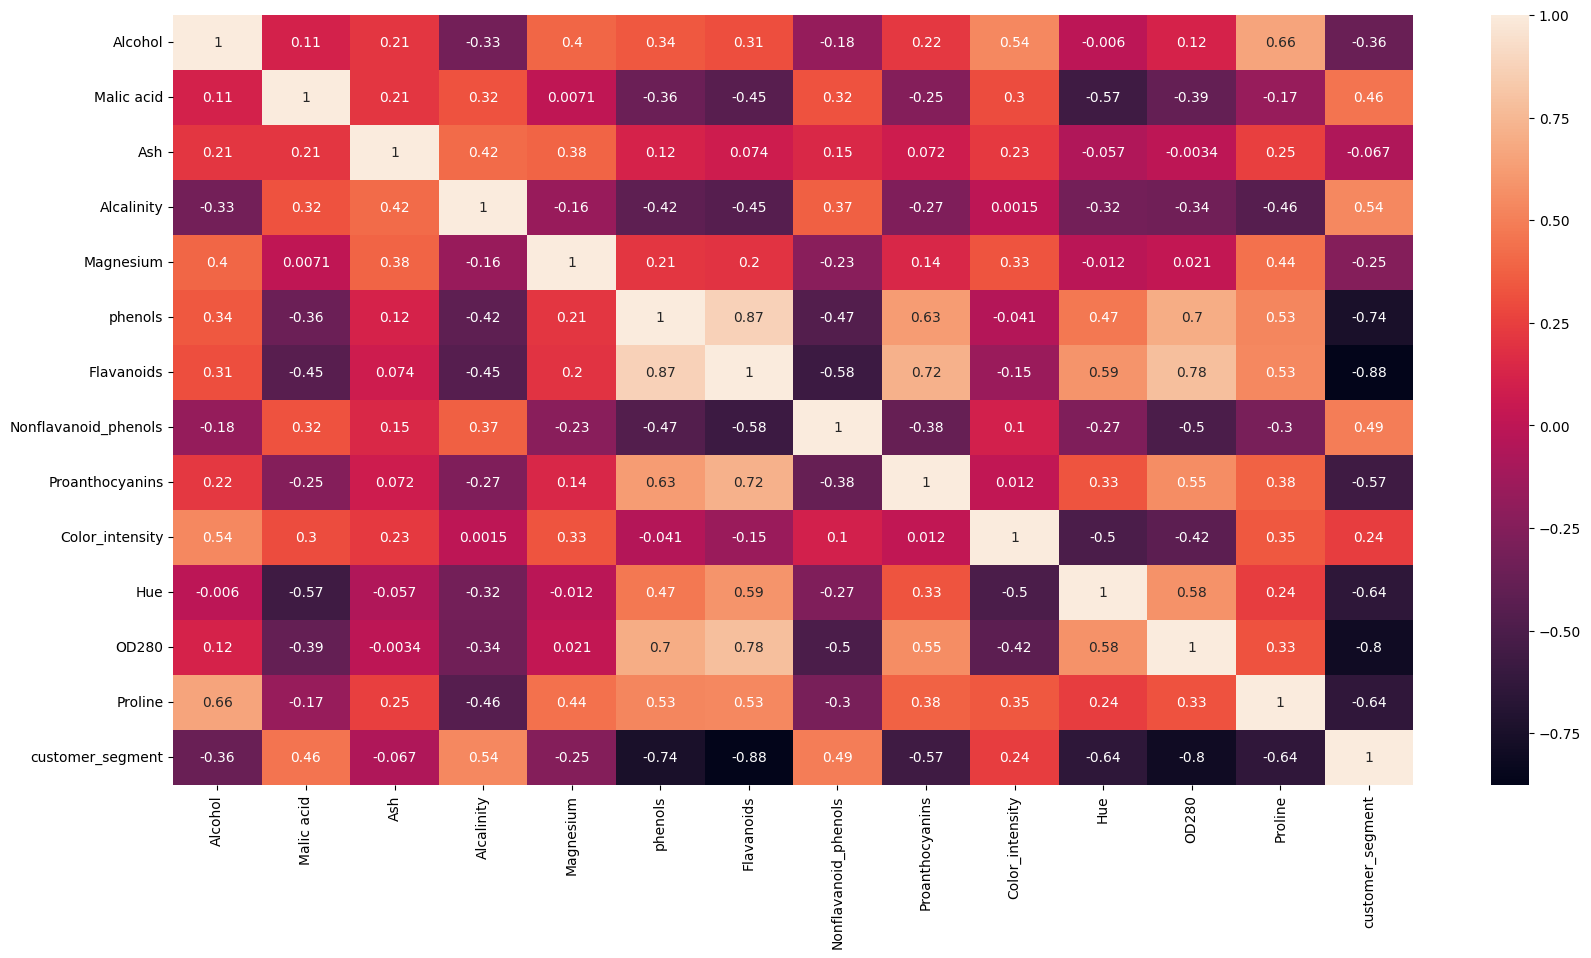

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cbar = True)
plt.show()

In [70]:
X = df.drop('customer_segment', axis = 1)
Y = df['customer_segment']
sc = StandardScaler()
X = sc.fit_transform(X)

In [71]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=3, test_size=0.3)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(116, 13)
(50, 13)
(116,)
(50,)


In [72]:
model = LogisticRegression()
model.fit(train_x, train_y)
pv = model.predict(test_x)
print('Accuracy score is : ', accuracy_score(pv, test_y))
print('Confusion Matrix is')
confusion_matrix(pv, test_y)


Accuracy score is :  0.98
Confusion Matrix is


array([[21,  0,  0],
       [ 0, 19,  1],
       [ 0,  0,  9]], dtype=int64)